## BayArea Data Exploration

Arezoo Besharati, UrbanSim, July 2018 


In [33]:
import os; os.chdir('../')
import numpy as np, pandas as pd 
from scipy.stats import skew
import warnings;warnings.simplefilter('ignore')
import orca
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
    
# Suppress scientific notation in the Pandas display output
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Load data

In [2]:
# Load any script-based Orca registrations
from scripts import datasources
from scripts import models

In [3]:
# get a list of all existing tables
orca.list_tables()

['parcels', 'buildings', 'rentals', 'units', 'households', 'persons', 'jobs']

### Generate Node variables

In [4]:
orca.run(['initialize_network'])

Running step 'initialize_network'
Time to execute step 'initialize_network': 19.77 s
Total time to execute iteration 1 with iteration value None: 19.78 s


In [5]:
orca.run(['network_aggregations'])

Running step 'network_aggregations'
Computing accessibility variables
Computing residential_units_500
Removed 4 rows because they contain missing values
Computing residential_units_1500
Removed 4 rows because they contain missing values
Computing population_1500
Removed 189769 rows because they contain missing values
Computing poor_1500
Removed 53114 rows because they contain missing values
Computing renters_1500
Removed 102597 rows because they contain missing values
Computing med_income_1500
Removed 189769 rows because they contain missing values
Computing job_1500
Computing job_25km
Computing ave_hhsize
Removed 189769 rows because they contain missing values
Computing med_rent_sqft_1500
Computing med_rent_sqft_7000
       residential_units_500  residential_units_1500  population_1500  \
count           30826.000000            30826.000000     30826.000000   
mean                4.360019                6.175426      3243.875000   
std                 2.391179                2.258851 

In [6]:
# make dataframes for all tables
frames = {name: orca.get_table(name).to_frame() for name in orca.list_tables()}

In [44]:
for table_name in orca.list_tables():
    print(table_name.upper())
    print(orca.get_table(table_name).to_frame().columns.tolist())
    print()

PARCELS
['development_type_id', 'land_value', 'acres', 'county_id', 'zone_id', 'proportion_undevelopable', 'tax_exempt_status', 'apn', 'parcel_id_local', 'geom_id', 'imputation_flag', 'x', 'y', 'shape_area', 'block_id', 'node_id']

BUILDINGS
['parcel_id', 'development_type_id', 'improvement_value', 'residential_units', 'residential_sqft', 'sqft_per_unit', 'non_residential_sqft', 'building_sqft', 'nonres_rent_per_sqft', 'res_price_per_sqft', 'stories', 'year_built', 'redfin_sale_price', 'redfin_sale_year', 'redfin_home_type', 'costar_property_type', 'costar_rent', 'building_type_id', 'node_id']

RENTALS
['neighborhood', 'price', 'bedrooms', 'date', 'sqft_per_unit', 'lon', 'lat', 'price_per_sqft', 'node_id']

UNITS
['Unnamed: 0', 'building_id', 'num_units', 'tenure', 'unit_num', 'unit_residential_price', 'unit_residential_rent', 'node_id']

HOUSEHOLDS
['household_id', 'serialno', 'persons', 'building_type', 'cars', 'income', 'race_of_head', 'hispanic_head', 'age_of_head', 'workers', 'sta

## Data Quality Check

 - Checking missing values
 - Checking the data types
 - Check for feature's distributions (the skewness)


## 1. Buildings Table

In [8]:
bld = frames['buildings']
bld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1843351 entries, 1 to 1843351
Data columns (total 19 columns):
parcel_id               int64
development_type_id     int64
improvement_value       float64
residential_units       int64
residential_sqft        int64
sqft_per_unit           float64
non_residential_sqft    int64
building_sqft           float64
nonres_rent_per_sqft    float64
res_price_per_sqft      float64
stories                 int64
year_built              int64
redfin_sale_price       float64
redfin_sale_year        float64
redfin_home_type        object
costar_property_type    object
costar_rent             object
building_type_id        int64
node_id                 object
dtypes: float64(7), int64(8), object(4)
memory usage: 281.3+ MB


### 1. 1. Missing values and data types

In [9]:
# Does data have missing values? 

print(color.BOLD + 'Data has missing values'+ color.END if bld.isnull().values.any() else 'Data doesnt have missing values')
print ('')

# What columns/ fields/ variables
print (color.BOLD +'Columns with missing values :\n'+ color.END + '{}'.format(bld.columns[bld.isna().any()].tolist()))
print ('')

# Check features datatypes and see if there is any string feature that needs to be int/float
print(color.BOLD + 'String Features: \n'+ color.END + '{}'.format(bld.dtypes[bld.dtypes == "object"]))


Data has missing values

Columns with missing values :
['redfin_sale_price', 'redfin_sale_year', 'redfin_home_type', 'costar_property_type', 'costar_rent', 'node_id']

String Features: 
redfin_home_type        object
costar_property_type    object
costar_rent             object
node_id                 object
dtype: object


costar_rent should be integer. 

In [10]:
# change the data type and update the column
bld.costar_rent = pd.to_numeric(bld.costar_rent, errors='coerce')

# Take a count of missing values. What proportion of the data is missing? 
missing_values_count_bld = bld[['redfin_sale_price', 'redfin_sale_year', 'redfin_home_type', 'costar_property_type', 'costar_rent']].isnull().sum()
print ('')
print(color.BOLD + 'BUILDINGS' + color.END + '\nCount of missing points: \n{}'.format (missing_values_count_bld))
print('Proportion of missing points: \n{}'.format (missing_values_count_bld/ len (bld.costar_rent)))
print ('')



BUILDINGS
Count of missing points: 
redfin_sale_price        755143
redfin_sale_year         755143
redfin_home_type             78
costar_property_type         78
costar_rent             1835287
dtype: int64
Proportion of missing points: 
redfin_sale_price       0.409658
redfin_sale_year        0.409658
redfin_home_type        0.000042
costar_property_type    0.000042
costar_rent             0.995625
dtype: float64



- 99% of costar rent is missing!! Don't use this feature
- 40 percent of redfin sale price and year is missing 

Let's find out what proportion of the missing values is associated with rental units

In [11]:
df = orca.merge_tables(target='units', tables = ['units','buildings'])
# Renters
prop_rentals = len(df[(df['redfin_sale_price'].isna() == True)&(df['tenure'] == 2)])/len(df)
print('{0:.2f} of data are rentals'.format(prop_rentals))

0.23 of data are rentals


So in fact 17% of the redfin data is missing

In [12]:
## let's look at the redfin_home_type
print (bld.redfin_home_type.unique())
print ("")
print(bld.redfin_home_type.value_counts())

['' 'Condo/Coop' 'Single Family Residential' 'Townhouse'
 'Multi-Family (2-4 Unit)' 'Vacant Land' 'Other' 'Multi-Family (5+ Unit)'
 'Mobile/Manufactured Home' 'Unknown' 'Timeshare' 'Ranch' None]

Single Family Residential    949541
                             755065
Multi-Family (2-4 Unit)       52348
Condo/Coop                    45274
Townhouse                     16022
Multi-Family (5+ Unit)        10957
Other                          6312
Vacant Land                    5642
Unknown                        1250
Mobile/Manufactured Home        859
Ranch                             2
Timeshare                         1
Name: redfin_home_type, dtype: int64


In [13]:
# See what proportion of building type is missing

missing_home_type = len(bld[(bld.redfin_home_type =='Other')|(bld.redfin_home_type =='Unknown')\
                            |(bld.redfin_home_type == '')])/len(bld)

print('{0:.2f} of data missing home type'.format(missing_home_type))

0.41 of data missing home type


In [31]:
# check the "res_price_per_sqft" var

bld.res_price_per_sqft.describe()

count   1843351.00
mean        289.68
std         265.06
min           0.00
25%         148.11
50%         252.34
75%         368.13
max       50161.09
Name: res_price_per_sqft, dtype: float64

<IPython.core.display.Javascript object>


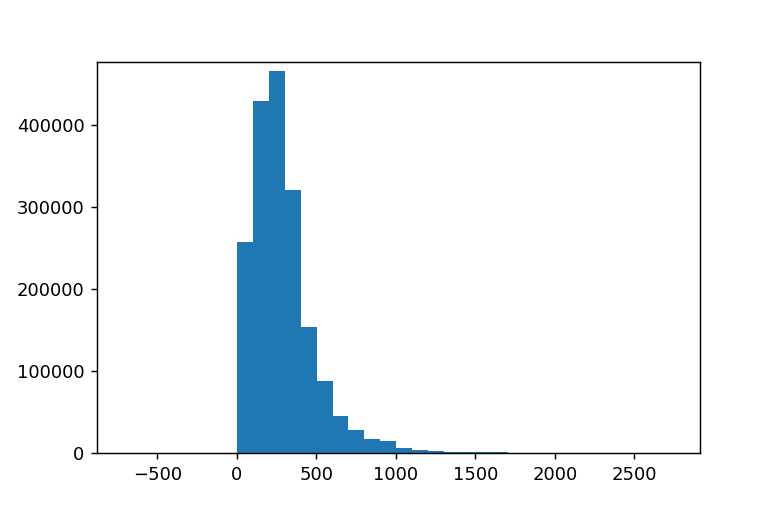

In [74]:
import matplotlib.pylab as plt
% matplotlib notebook
plt.hist(bld.res_price_per_sqft,bins =500);
plt.show()

In [42]:
residential_price_zero = len(bld[bld.res_price_per_sqft == 0])/len(bld)
print('The residential price per sqft for {0:.2f} of data is zero'.format(residential_price_zero))

The residential price per sqft for 0.08 of data is zero


In [53]:
#Proportion of residential and non-residential buildings

non_residential_bld = len (bld[bld['residential_units']==0])/len(bld)
print('{0:.2f} of building are residential'.format(1- non_residential_bld))
print('{0:.2f} of building are non-residential'.format(non_residential_bld))


0.92 of building are residential
0.08 of building are non-residential


### 1. 2. Skewness

In [14]:
numeric_feats = bld.dtypes[bld.dtypes != "object"].index

skewed_feats = bld[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.5]
print(color.BOLD +'Skewed features are as follows'+ color.END + '\n{}'.format (skewed_feats))

Skewed features are as follows
development_type_id       5.016555
improvement_value       426.819356
residential_units        81.661524
residential_sqft        268.561217
sqft_per_unit             7.571696
non_residential_sqft    262.976882
building_sqft           182.739753
nonres_rent_per_sqft      5.122144
res_price_per_sqft       15.234865
stories                  15.571343
redfin_sale_price        62.174607
costar_rent               9.356972
building_type_id          4.316067
dtype: float64


_____________________________________________________________________________________________________

## 2. Households Table

In [15]:
households = frames['households']
households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679684 entries, 0 to 2679683
Data columns (total 21 columns):
household_id      int64
serialno          int64
persons           int64
building_type     float64
cars              float64
income            float64
race_of_head      int64
hispanic_head     object
age_of_head       int64
workers           float64
state             int64
county            int64
tract             int64
block group       int64
children          float64
tenure            int64
recent_mover      int64
block_group_id    int64
single_family     bool
unit_id           int64
node_id           object
dtypes: bool(1), float64(5), int64(13), object(2)
memory usage: 411.4+ MB


### 2. 1. Missing values and data types

In [16]:
# Does data have missing values? 
print(color.BOLD + 'Data has missing values'+ color.END if households.isnull().values.any() else 'Data doesnt have missing values')
print ('')

# What columns/ variables
print ('Columns with missing values : {}'.format(households.columns[households.isna().any()].tolist()))
print ('')

# Check features datatypes and see if there is any string feature that needs to be int/float
print(color.BOLD + 'String Features: \n'+ color.END + '{}'.format(households.dtypes[households.dtypes == "object"]))

Data has missing values

Columns with missing values : ['workers', 'children', 'node_id']

String Features: 
hispanic_head    object
node_id          object
dtype: object


In [17]:
# Take a count of missing values. What proportion of the data is missing? 
missing_values_count_hh = households[['workers', 'children', 'node_id']].isnull().sum()
print ('')
print(color.BOLD + 'HOUSEHOLDS' + color.END + '\nCount of missing points: \n{}'.format (missing_values_count_hh))
print('Proportion of missing points: \n{}'.format (missing_values_count_hh/ len (households.node_id)))


HOUSEHOLDS
Count of missing points: 
workers      581022
children    1835041
node_id      189769
dtype: int64
Proportion of missing points: 
workers     0.216825
children    0.684798
node_id     0.070818
dtype: float64


_____________________________________________________________________________________________________

## 3. Parcels Table

In [18]:
parcels = frames['parcels']
parcels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956212 entries, 229116 to 572927
Data columns (total 16 columns):
development_type_id         int64
land_value                  float64
acres                       float64
county_id                   int64
zone_id                     int64
proportion_undevelopable    float64
tax_exempt_status           int64
apn                         object
parcel_id_local             object
geom_id                     int64
imputation_flag             object
x                           float64
y                           float64
shape_area                  float64
block_id                    object
node_id                     object
dtypes: float64(6), int64(5), object(5)
memory usage: 253.7+ MB


In [19]:
# Does data have missing values? 
print(color.BOLD + 'Data has missing values'+ color.END if parcels.isnull().values.any() else 'Data doesnt have missing values')
print ('')

# What columns/ variables
print ('Columns with missing values : {}'.format(parcels.columns[parcels.isna().any()].tolist()))
print ('')


#Check features datatypes and see if there is any string feature that needs to be int/float
print(color.BOLD + 'String Features: \n'+ color.END + '{}'.format(parcels.dtypes[parcels.dtypes == "object"]))
print ('')

# Take a count of missing values. What proportion of the data is missing? 
missing_values_count_parcels = parcels[['x', 'y', 'block_id', 'node_id']].isnull().sum()
print(color.BOLD + 'PARCELS' + color.END + '\nCount of missing points: \n {}'.format(missing_values_count_parcels))
print('Proportion of missing points: \n{}'.format(missing_values_count_parcels/ len(parcels.node_id)))

Data has missing values

Columns with missing values : ['x', 'y', 'block_id', 'node_id']

String Features: 
apn                object
parcel_id_local    object
imputation_flag    object
block_id           object
node_id            object
dtype: object

PARCELS
Count of missing points: 
 x           4
y           4
block_id    5
node_id     4
dtype: int64
Proportion of missing points: 
x           0.000002
y           0.000002
block_id    0.000003
node_id     0.000002
dtype: float64


_____________________________________________________________________________________________________

## 4. Node Variables


In [20]:
nodes = frames['nodes']
nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30826 entries, 281266 to 5461052801
Data columns (total 11 columns):
residential_units_500     30826 non-null float32
residential_units_1500    30826 non-null float32
population_1500           30826 non-null float32
poor_1500                 30826 non-null float32
renters_1500              30826 non-null float32
med_income_1500           30826 non-null float32
job_1500                  30826 non-null float32
job_25km                  30826 non-null float32
ave_hhsize                30826 non-null float32
med_rent_sqft_1500        30826 non-null float32
med_rent_sqft_7000        30826 non-null float32
dtypes: float32(11)
memory usage: 1.5 MB


### 4. 1. Missing values and Data types

In [21]:
# Does data have missing values? 
print(color.BOLD + 'Data has missing values'+ color.END if nodes.isnull().values.any() else 'Data doesnt have missing values')
print ('')
print ('Nodes table shape{}'.format(nodes.shape))


Data doesnt have missing values

Nodes table shape(30826, 11)


### 4. 2. Skewness

In [22]:
numeric_feats = nodes.dtypes[nodes.dtypes != "object"].index

skewed_feats = nodes[numeric_feats].apply(lambda x: skew(x))
print(color.BOLD +'Skewed features are as follows'+ color.END + '\n{}'.format (skewed_feats))

Skewed features are as follows
residential_units_500    -0.831149
residential_units_1500   -1.568542
population_1500           3.155539
poor_1500                -1.123878
renters_1500             -0.984857
med_income_1500           0.944540
job_1500                 -2.902729
job_25km                 -5.457487
ave_hhsize               -2.768345
med_rent_sqft_1500       -0.800983
med_rent_sqft_7000       -0.892179
dtype: float64


## Anomaly Detection

In [23]:
df = orca.merge_tables(target='units', tables=['units','buildings','nodes'])

In [24]:
non_residential_sqft = len(df[df.non_residential_sqft != 0])/len(df)

print('{0:.3f} of data has non_residential space'.format(non_residential_sqft))

0.036 of data has non_residential space


In [25]:
res_price_per_sqft = len (df[df.res_price_per_sqft == 0])/ len(df)

print('{0:.3f} of data is probably not residential'.format(res_price_per_sqft))

0.002 of data is probably not residential
